In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer,normalize
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score,classification_report, confusion_matrix, precision_recall_curve, roc_curve,  auc)
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load any CSV file (ensure it contains only numeric data for normalization,
# and categorical class label)
#in this demo i didn't handle categorical features
#for that check another demo
#read full documentation from link: https://pandas.pydata.org/docs/user_guide/io.html
df = pd.read_csv('wine.csv')

In [3]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Selecting only numeric columns
#numeric_df = df.select_dtypes(include=['number'])
'''Selects only the numeric columns from a Pandas DataFrame (df).
for 'wine.csv' this is not needed as all features are already numeric
What Does include=['number'] Do?
It filters columns whose data types (dtypes) are numeric.
It includes integers (int) and floating-point (float) numbers.
It does not include non-numeric types like object, string, datetime, or boolean.'''

"Selects only the numeric columns from a Pandas DataFrame (df).\nWhat Does include=['number'] Do?\nIt filters columns whose data types (dtypes) are numeric.\nIt includes integers (int) and floating-point (float) numbers.\nIt does not include non-numeric types like object, string, datetime, or boolean."

In [5]:
X=df.iloc[:,1:] #range of row and column [row,col] with iloc; start:end; if not specified, start=0,end=length of that dimension
y=df.iloc[:,0] # as target label which is type of wine is the first column

In [6]:
#perform Train-Test split, then use same pre-processing pipeline for both
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, stratify=y)
'''stratify=Y ensures that the proportion of each class in the training and test sets matches the original dataset.
This prevents situations where some classes are missing in the test set.'
'''

"stratify=Y ensures that the proportion of each class in the training and test sets matches the original dataset.\nThis prevents situations where some classes are missing in the test set.'\n"

In [7]:
# Apply column-wise normalizations using inline method

#X_norm1 = normalize(X_train, norm='l1', axis=0)  #axis=0 option suggests normalize data column wise

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
'''sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)[source]
Scale input vectors individually to unit norm (vector length).
Read more in the User Guide.
Parameters X
{array-like, sparse matrix} of shape (n_samples, n_features)
The data to normalize, element by element. scipy.sparse matrices should be in CSR format to avoid an un-necessary copy.
norm {‘l1’, ‘l2’, ‘max’}, default=’l2’
The norm to use to normalize each non zero sample (or each non-zero feature if axis is 0).
axis {0, 1}, default=1
Define axis used to normalize the data along. If 1, independently normalize each sample, otherwise (if 0) normalize each feature.
'''

"sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)[source]\nScale input vectors individually to unit norm (vector length).\nRead more in the User Guide.\nParameters X\n{array-like, sparse matrix} of shape (n_samples, n_features)\nThe data to normalize, element by element. scipy.sparse matrices should be in CSR format to avoid an un-necessary copy.\nnorm {‘l1’, ‘l2’, ‘max’}, default=’l2’\nThe norm to use to normalize each non zero sample (or each non-zero feature if axis is 0).\naxis {0, 1}, default=1\nDefine axis used to normalize the data along. If 1, independently normalize each sample, otherwise (if 0) normalize each feature.\n"

In [8]:
# Define the pipeline: Scaling + MLP Classifier
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('mlp', MLPClassifier(max_iter=1500, random_state=42))  # MLP model
])

In [9]:
# Define hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (10,10,), (5,10),(5, )],  # Single & double-layer architectures
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001],  # Regularization parameter
    'mlp__learning_rate': ['constant', 'adaptive']
}

In [10]:
# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(max_iter=1500,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(10,), (10, 10), (5, 10),
                                                     (5,)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [11]:
estimators = grid_search.cv_results_['params']


In [12]:
estimators

[{'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (10,),
  'mlp__learning_rate': 'constant',
  'mlp__solver': 'adam'},
 {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (10,),
  'mlp__learning_rate': 'constant',
  'mlp__solver': 'sgd'},
 {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (10,),
  'mlp__learning_rate': 'adaptive',
  'mlp__solver': 'adam'},
 {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (10,),
  'mlp__learning_rate': 'adaptive',
  'mlp__solver': 'sgd'},
 {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (10, 10),
  'mlp__learning_rate': 'constant',
  'mlp__solver': 'adam'},
 {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (10, 10),
  'mlp__learning_rate': 'constant',
  'mlp__solver': 'sgd'},
 {'mlp__activation': 'relu',
  'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (10, 10),

In [13]:
estimators_df=pd.DataFrame(estimators)

In [14]:
estimators_df.head()

,mlp__activation,mlp__alpha,mlp__hidden_layer_sizes,mlp__learning_rate,mlp__solver
0,relu,0.0001,"(10,)",constant,adam
1,relu,0.0001,"(10,)",constant,sgd
2,relu,0.0001,"(10,)",adaptive,adam
3,relu,0.0001,"(10,)",adaptive,sgd
4,relu,0.0001,"(10, 10)",constant,adam


In [15]:
estimators_df.shape

(64, 5)

In [16]:
all_estimators = grid_search.cv_results_


In [17]:
all_estimators

{'mean_fit_time': array([0.53486605, 0.59898772, 0.45762935, 0.60249557, 0.51829655,
        0.70073667, 0.44255464, 0.85058553, 0.44822135, 0.60193439,
        0.42044835, 0.63463914, 0.4415808 , 0.61961255, 0.44764707,
        0.64309118, 0.37155511, 0.42562387, 0.35992246, 0.46152787,
        0.36902034, 0.59427159, 0.38585775, 0.65931261, 0.42328184,
        0.60234175, 0.42586613, 0.62944832, 0.4612242 , 0.61898923,
        0.46208384, 0.64374967, 0.38250287, 0.45914509, 0.38675814,
        0.48828261, 0.42246501, 0.67039638, 0.42823443, 0.7107933 ,
        0.49346714, 0.69633799, 0.49531825, 0.74167154, 0.50748544,
        0.55485628, 0.51207433, 0.58896165, 0.38673193, 0.46564538,
        0.38953264, 0.4940048 , 0.44922912, 0.73807628, 0.43588791,
        0.73287225, 0.49625678, 0.71357372, 0.50334392, 0.74859293,
        0.50398173, 0.57314594, 0.50718296, 0.5501828 ]),
 'std_fit_time': array([0.13232483, 0.23949093, 0.07980646, 0.1222194 , 0.08340196,
        0.06686082, 0.085

In [18]:
grid_search.cv_results_

{'mean_fit_time': array([0.53486605, 0.59898772, 0.45762935, 0.60249557, 0.51829655,
        0.70073667, 0.44255464, 0.85058553, 0.44822135, 0.60193439,
        0.42044835, 0.63463914, 0.4415808 , 0.61961255, 0.44764707,
        0.64309118, 0.37155511, 0.42562387, 0.35992246, 0.46152787,
        0.36902034, 0.59427159, 0.38585775, 0.65931261, 0.42328184,
        0.60234175, 0.42586613, 0.62944832, 0.4612242 , 0.61898923,
        0.46208384, 0.64374967, 0.38250287, 0.45914509, 0.38675814,
        0.48828261, 0.42246501, 0.67039638, 0.42823443, 0.7107933 ,
        0.49346714, 0.69633799, 0.49531825, 0.74167154, 0.50748544,
        0.55485628, 0.51207433, 0.58896165, 0.38673193, 0.46564538,
        0.38953264, 0.4940048 , 0.44922912, 0.73807628, 0.43588791,
        0.73287225, 0.49625678, 0.71357372, 0.50334392, 0.74859293,
        0.50398173, 0.57314594, 0.50718296, 0.5501828 ]),
 'std_fit_time': array([0.13232483, 0.23949093, 0.07980646, 0.1222194 , 0.08340196,
        0.06686082, 0.085

In [19]:
cv_results_df=pd.DataFrame(grid_search.cv_results_)

In [20]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,param_mlp__solver,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.534866,0.132325,0.003969,0.000568,relu,0.0001,"(10,)",constant,adam,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,0.928571,1.0,0.857143,1.000000,1.0,1.0,1.000000,0.971905,0.046969,17
1,0.598988,0.239491,0.005357,0.003212,relu,0.0001,"(10,)",constant,sgd,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,1.000000,1.0,0.928571,0.928571,1.0,1.0,0.857143,0.964762,0.047581,41
2,0.457629,0.079806,0.003962,0.001565,relu,0.0001,"(10,)",adaptive,adam,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,0.928571,1.0,0.857143,1.000000,1.0,1.0,1.000000,0.971905,0.046969,17
3,0.602496,0.122219,0.005056,0.002169,relu,0.0001,"(10,)",adaptive,sgd,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,1.000000,1.0,0.928571,0.928571,1.0,1.0,0.857143,0.964762,0.047581,41
4,0.518297,0.083402,0.003405,0.000439,relu,0.0001,"(10, 10)",constant,adam,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,0.928571,1.0,0.928571,0.928571,1.0,1.0,1.000000,0.971905,0.034434,17


In [21]:
# Get best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (5,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}


In [22]:
# Get best model from grid search
best_model = grid_search.best_estimator_

In [23]:
grid_search.estimator

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp', MLPClassifier(max_iter=1500, random_state=42))])

In [24]:
# Predict on test set using full pipeline that was applied on X_train, will be used on X_test
y_pred = best_model.predict(X_test)

In [25]:
y_pred

array([1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2,
       3, 3, 2, 2, 3, 1, 1, 2, 3, 3, 2, 1, 3, 1], dtype=int64)

In [26]:
# Evaluate on test data

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 1.0000


In [27]:
# Extract MLP model from the pipeline
mlp_model = best_model.named_steps['mlp']

In [28]:
# Print neural network configuration
print(f"Input Layer: {mlp_model.n_features_in_} neurons")
print(f"Hidden Layers: {mlp_model.hidden_layer_sizes} neurons")
print(f"Output Layer: {mlp_model.n_outputs_} neurons")

Input Layer: 13 neurons
Hidden Layers: (5,) neurons
Output Layer: 3 neurons


In [29]:

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)


In [30]:
fpr

array([0.        , 0.45454545, 0.45454545, 1.        ])

In [31]:
tpr

array([0., 0., 1., 1.])

In [32]:
thresholds

array([inf,  3.,  2.,  1.])

In [33]:
roc_auc = auc(fpr, tpr)

In [34]:
roc_auc

0.5454545454545454

In [35]:
y_scores =best_model.predict_proba(X_test)  # Get predicted probabilities
'''predict_proba() Only Works for Probability-Based Models
The predict_proba() method is not available for MLPClassifier if solver='lbfgs' (it only works with 'adam' or 'sgd').'''



"predict_proba() Only Works for Probability-Based Models\nThe predict_proba() method is not available for MLPClassifier if solver='lbfgs' (it only works with 'adam' or 'sgd')."

In [36]:
y_scores

array([[0.98210132, 0.00800232, 0.00989636],
       [0.008033  , 0.98878106, 0.00318595],
       [0.94548006, 0.03807906, 0.01644088],
       [0.0046225 , 0.9908471 , 0.00453039],
       [0.00845822, 0.98696857, 0.00457321],
       [0.98138052, 0.0098906 , 0.00872888],
       [0.03174688, 0.0046627 , 0.96359043],
       [0.9705848 , 0.02051199, 0.0089032 ],
       [0.25012524, 0.64687843, 0.10299632],
       [0.00785015, 0.98939055, 0.0027593 ],
       [0.96400054, 0.02379905, 0.01220041],
       [0.0144143 , 0.06823002, 0.91735568],
       [0.97021519, 0.01667423, 0.01311059],
       [0.02400718, 0.00793995, 0.96805287],
       [0.07266189, 0.91908401, 0.0082541 ],
       [0.96263745, 0.01950442, 0.01785813],
       [0.27415428, 0.71275535, 0.01309037],
       [0.9824396 , 0.00890056, 0.00865984],
       [0.03428872, 0.00412413, 0.96158714],
       [0.002263  , 0.9901054 , 0.0076316 ],
       [0.00126531, 0.98159334, 0.01714135],
       [0.03467662, 0.96161389, 0.00370949],
       [0.

In [37]:
y_scores.shape

(36, 3)

In [38]:
y_scores_df=pd.DataFrame(y_scores,columns=['wine1','wine2','wine3'])

In [39]:
y_scores_df

,wine1,wine2,wine3
0,0.982101,0.008002,0.009896
1,0.008033,0.988781,0.003186
2,0.945480,0.038079,0.016441
3,0.004623,0.990847,0.004530
4,0.008458,0.986969,0.004573
5,0.981381,0.009891,0.008729
6,0.031747,0.004663,0.963590
7,0.970585,0.020512,0.008903
8,0.250125,0.646878,0.102996
9,0.007850,0.989391,0.002759


In [40]:
y_test.shape

(36,)

In [41]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc
)

In [42]:
# Display classification report
print("\nClassification Report:")

print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [43]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [44]:
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

In [45]:
target_names = ['wine1', 'wine2', 'wine3']

Text(70.72222222222221, 0.5, 'True Labels')

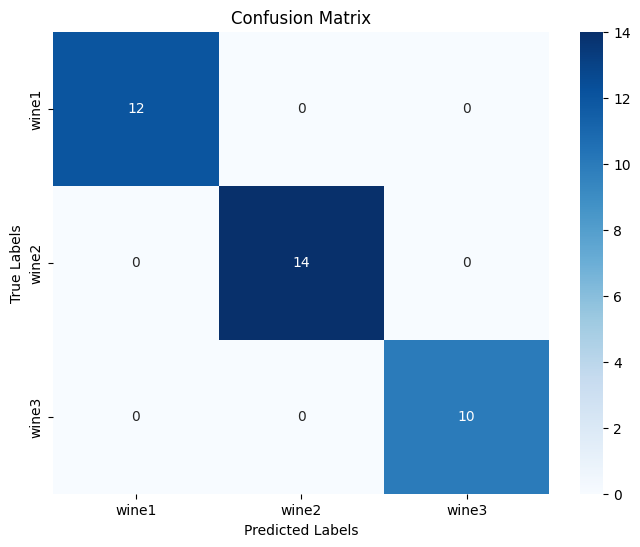

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [47]:
# Binarize the output for multiclass ROC
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_scores = best_model.predict_proba(X_test)



In [48]:
y_test_bin

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [49]:
y_scores

array([[0.98210132, 0.00800232, 0.00989636],
       [0.008033  , 0.98878106, 0.00318595],
       [0.94548006, 0.03807906, 0.01644088],
       [0.0046225 , 0.9908471 , 0.00453039],
       [0.00845822, 0.98696857, 0.00457321],
       [0.98138052, 0.0098906 , 0.00872888],
       [0.03174688, 0.0046627 , 0.96359043],
       [0.9705848 , 0.02051199, 0.0089032 ],
       [0.25012524, 0.64687843, 0.10299632],
       [0.00785015, 0.98939055, 0.0027593 ],
       [0.96400054, 0.02379905, 0.01220041],
       [0.0144143 , 0.06823002, 0.91735568],
       [0.97021519, 0.01667423, 0.01311059],
       [0.02400718, 0.00793995, 0.96805287],
       [0.07266189, 0.91908401, 0.0082541 ],
       [0.96263745, 0.01950442, 0.01785813],
       [0.27415428, 0.71275535, 0.01309037],
       [0.9824396 , 0.00890056, 0.00865984],
       [0.03428872, 0.00412413, 0.96158714],
       [0.002263  , 0.9901054 , 0.0076316 ],
       [0.00126531, 0.98159334, 0.01714135],
       [0.03467662, 0.96161389, 0.00370949],
       [0.

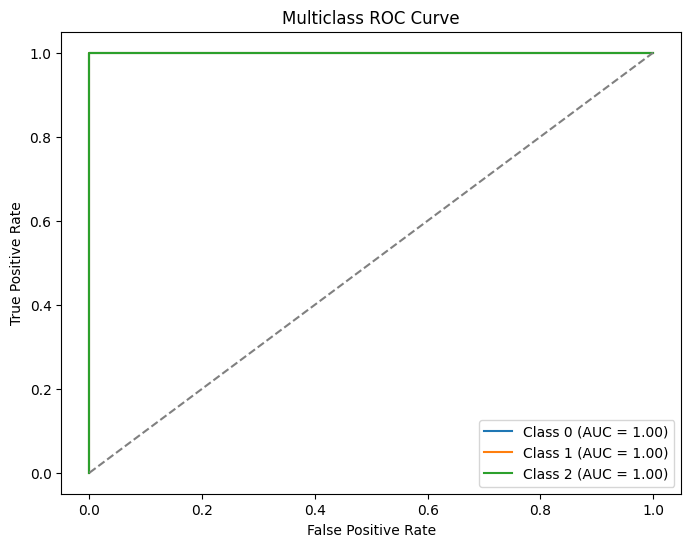

In [50]:
# Compute ROC curve for each class
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    # Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
import joblib

# Save the entire grid search object
joblib.dump(grid_search, 'grid_search_model.pkl')


['grid_search_model.pkl']

In [52]:
# Load the saved grid search object
loaded_grid_search = joblib.load('grid_search_model.pkl')

# Access the best estimator
best_model = loaded_grid_search.best_estimator_


In [53]:
# Save only the best estimator
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')


['best_model.pkl']

In [54]:
#loading the best model
best_model = joblib.load('best_model.pkl')


In [55]:
#saving each model separately
for i, params in enumerate(grid_search.cv_results_['params']):
    model = grid_search.best_estimator_.set_params(**params)
    joblib.dump(model, f'model_{i}.pkl')


In [56]:
n_classes

3